In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(list(range(9)))

[0, 1, 2, 3, 4, 5, 6, 7, 8]


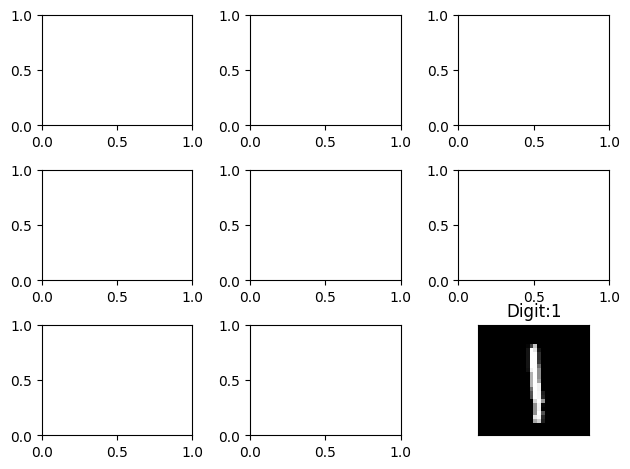

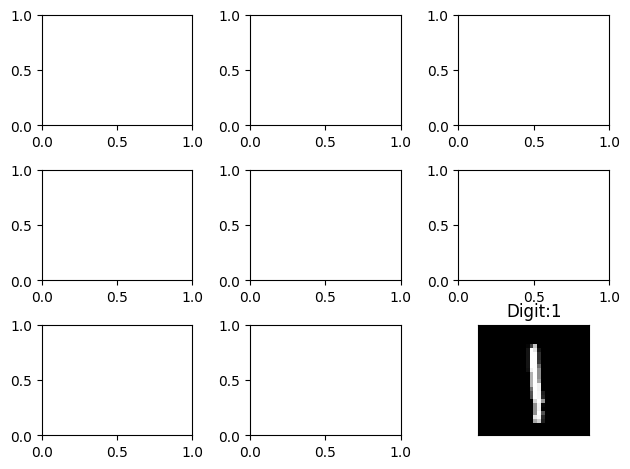

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
plt.imshow(train_images[i],cmap='gray',interpolation='none')
plt.title("Digit:{}".format(train_labels[i]))
plt.xticks([])
plt.yticks([])
fig

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.shape[0]

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.8976 - loss: 0.3276 - val_accuracy: 0.9811 - val_loss: 0.0599
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9880 - val_loss: 0.0369
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9912 - val_loss: 0.0257
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9913 - val_loss: 0.0271


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9877 - loss: 0.0360
test accuracy:0.9912999868392944


In [ ]:
test_loss,test_acc = model.evaluate(train_images, train_labels)
print(f'train accuracy: {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9954 - loss: 0.0154
train accuracy: 0.9952666759490967


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([[2.1428211e-10, 1.1943470e-07, 6.6123938e-08, ..., 9.9999946e-01,
        7.2195179e-09, 2.1423972e-07],
       [6.9512595e-07, 6.7165485e-07, 9.9999779e-01, ..., 1.2644240e-08,
        2.9937379e-08, 1.4122870e-12],
       [5.2093835e-10, 9.9999970e-01, 1.6695969e-08, ..., 2.9168942e-07,
        1.1843772e-09, 1.8067130e-10],
       ...,
       [6.8964208e-13, 6.6605064e-09, 3.1559896e-10, ..., 9.0840944e-09,
        9.9680051e-09, 4.3373882e-10],
       [3.0668323e-10, 6.7128476e-11, 2.8477025e-13, ..., 7.5059403e-11,
        1.9536024e-07, 4.1895088e-08],
       [1.7518495e-06, 1.2415940e-09, 4.6723159e-08, ..., 1.0647560e-13,
        1.6297552e-09, 8.1329804e-10]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

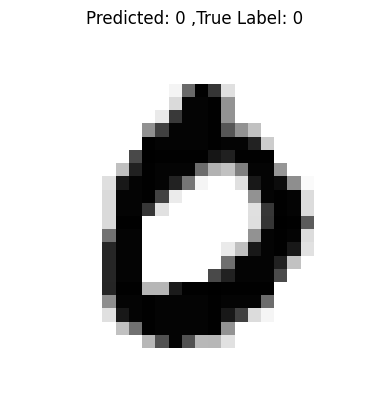

In [ ]:
predict_image(3)

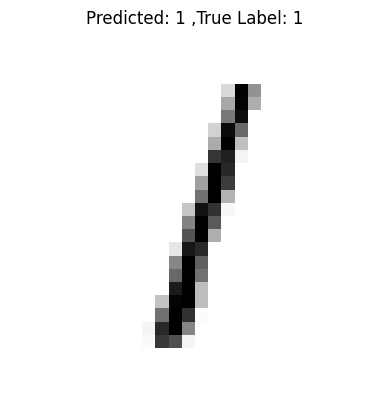

In [ ]:
predict_image(2)

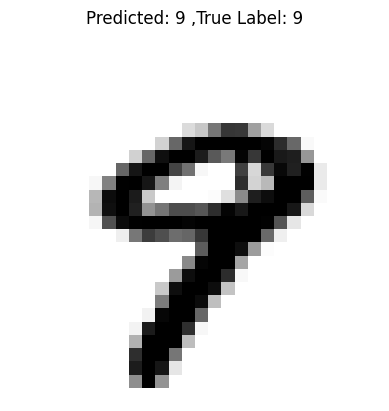

In [ ]:
predict_image(9)

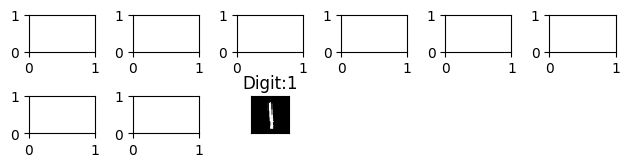

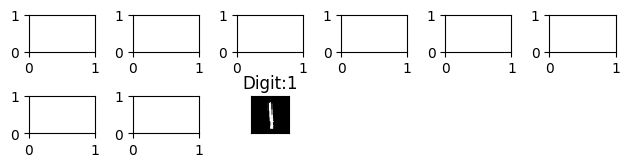

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(6,6,i+1)
  plt.tight_layout()
plt.imshow(train_images[i],cmap='gray',interpolation='none')
plt.title("Digit:{}".format(train_labels[i]))
plt.xticks([])
plt.yticks([])
fig

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images.shape[0]

60000

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(6,6),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(6,6),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(12,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 104ms/step - accuracy: 0.5122 - loss: 1.3078 - val_accuracy: 0.9626 - val_loss: 0.1127
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 103ms/step - accuracy: 0.9650 - loss: 0.1097 - val_accuracy: 0.9756 - val_loss: 0.0720
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 102ms/step - accuracy: 0.9784 - loss: 0.0702 - val_accuracy: 0.9779 - val_loss: 0.0701
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 100ms/step - accuracy: 0.9837 - loss: 0.0515 - val_accuracy: 0.9864 - val_loss: 0.0425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 100ms/step - accuracy: 0.9865 - loss: 0.0414 - val_accuracy: 0.9797 - val_loss: 0.0630


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9745 - loss: 0.0787
test accuracy : 0.9797000288963318


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9823 - loss: 0.0505
train accuracy : 0.9831666946411133


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([[1.43852191e-07, 2.58728437e-06, 1.47594801e-05, ...,
        4.22220270e-04, 3.82828578e-12, 3.35986620e-12],
       [6.51477239e-06, 5.50851564e-06, 9.99985039e-01, ...,
        4.06012446e-10, 2.44779499e-15, 1.62583146e-15],
       [2.99772114e-06, 9.99163806e-01, 2.23173833e-04, ...,
        2.64867549e-06, 1.12646545e-10, 1.67937650e-10],
       ...,
       [1.37499647e-12, 6.55516388e-08, 3.42616879e-10, ...,
        3.44677993e-08, 9.29384601e-17, 5.63102739e-17],
       [1.45148990e-10, 7.88412502e-10, 4.10842801e-12, ...,
        3.27003846e-08, 6.49914062e-20, 6.46319252e-20],
       [7.66294590e-07, 1.01323803e-08, 6.53991719e-07, ...,
        1.51470712e-08, 8.43636752e-14, 5.83868755e-14]], dtype=float32)

In [ ]:
np.argmax(predictions[4])

4

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

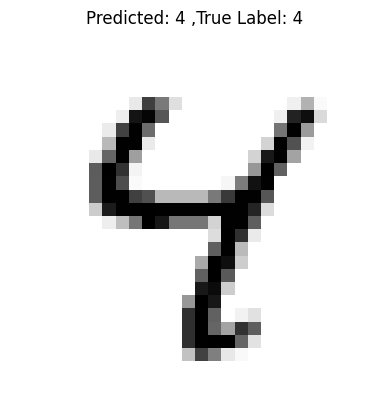

In [ ]:
predict_image(6)

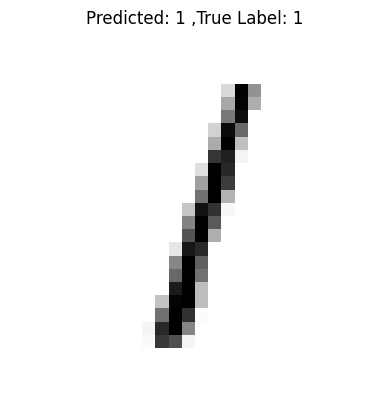

In [ ]:
predict_image(2)

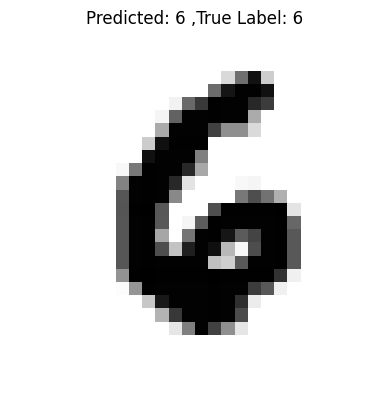

In [ ]:
predict_image(130)